# Minimal working examples:

For exhaustive details and further functionality, please see the comments on the function ```robust_nmf()``` in ```torch_functions.py``` or ```numpy_functions.py```.

This file implements everything in PyTorch. For NumPy, just ```import numpy```, replace all instances of ```torch``` with ```numpy``` and remove the ```.cuda()``` suffix.

# Switching between backends:

In [55]:
# Setting paths such that this notebook can see the relevant files.
import sys
sys.path.append("..")

import numpy as np
from backends.numpy_functions import robust_nmf
import scipy.io as sio

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [56]:
data = sio.loadmat("../data/Urban_R162.mat")['Y']


In [57]:
basis, coeff, outlier, obj = robust_nmf(data,
                                        rank=6,
                                        beta=1.5,
                                        init='NMF',
                                        reg_val=1,
                                        sum_to_one=0,
                                        tol=1e-7,
                                        max_iter=200)

Initializing rNMF with NMF.
violation: 1.0
violation: 0.5211958075744432
violation: 0.2148246582555471
violation: 0.11895320543605262
violation: 0.07163353959489142
violation: 0.05011660728950332
violation: 0.0391847344741257
violation: 0.032952676168889354
violation: 0.02914956915417957
violation: 0.026623672192621073
violation: 0.024686542130558722
violation: 0.02299674102236014
violation: 0.02137835760718811
violation: 0.019777127968107495
violation: 0.018243969662200096
violation: 0.0168143096002737
violation: 0.015515947301733429
violation: 0.014355078860338499
violation: 0.013334369034520862
violation: 0.012445596789342301
violation: 0.011679746758502916
violation: 0.011015706364563517
violation: 0.010437336098015448
violation: 0.009926248411620795
violation: 0.009475741151573373
violation: 0.009086805924251899
violation: 0.008746272881644594
violation: 0.008445399923483839
violation: 0.008181085330386762
violation: 0.007953124959044282
violation: 0.007755490126766553
violation: 

/Users/kennethmitchell/miniconda3/envs/rnmf_torch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Iter = 0; Obj = 22884311.902459923
Iter = 1; Obj = 22190964.19040706; Err = 0.030297948874675688
Iter = 11; Obj = 20165518.780009635; Err = 0.00800825038282289
Iter = 21; Obj = 18697187.90830978; Err = 0.0072387195386575155
Iter = 31; Obj = 17440058.463751834; Err = 0.00669092909661061
Iter = 41; Obj = 16360308.992715176; Err = 0.006092622813814526
Iter = 51; Obj = 15444878.707774783; Err = 0.005457897002877163
Iter = 61; Obj = 14674962.475706922; Err = 0.004814999488840997
Iter = 71; Obj = 14029721.79162284; Err = 0.004222091344645854
Iter = 81; Obj = 13489268.111961944; Err = 0.0036815458914308953
Iter = 91; Obj = 13036322.517965108; Err = 0.0031982882860940604
Iter = 101; Obj = 12655772.647930935; Err = 0.0027733686364016666
Iter = 111; Obj = 12333838.686941288; Err = 0.0024179594365113773
Iter = 121; Obj = 12060331.283768605; Err = 0.0021033857381000946
Iter = 131; Obj = 11826832.717162132; Err = 0.001834655249772461
Iter = 141; Obj = 11626401.17716714; Err = 0.001606611592989803
I

Output:
1. basis: basis matrix of the factorization.
2. coeff: coefficient matrix of the factorization.
3. outlier: sparse outlier matrix.
4. obj: objective function progress.

In [58]:
H = coeff
W = basis

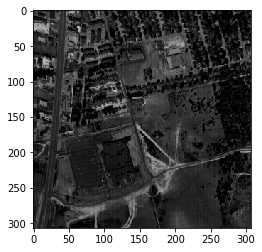

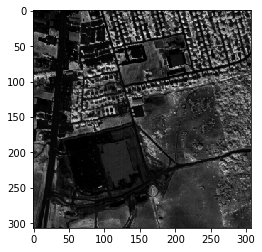

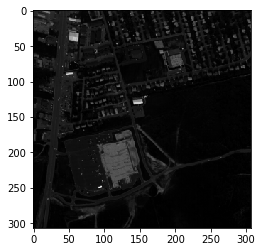

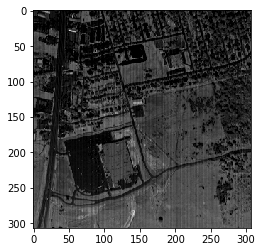

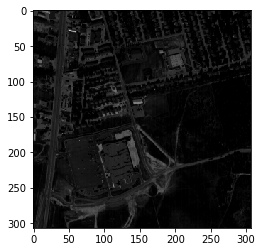

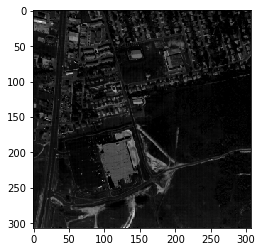

In [59]:
for i in range(0,6):
    fst_row = H[i]
    fst_image = H[i].reshape((307, 307))

    plt.imshow(fst_image, cmap='gray', interpolation='nearest')
    plt.show()

In [60]:
wavelength = sio.loadmat("../data/Urban_R162.mat")["SlectBands"]

def radiation_expected(wavelength):
    return 3.8 * 10**8 / wavelength

def convertWToReflectivity(W):
    if(len(wavelength) != len(W)): return None
    newW = []

    for i in range(len(W)):
        newRow = []
        for j in range(len(W[i])):
            val =( W[i][j] / radiation_expected(wavelength[i])) * 100
            newRow += [val]
        newW += [newRow]

    newW = np.array(newW)[:,:,0]
    return newW

def plot_endmembers(W, n_comps, title="Endmembers"):
    W_t = W.transpose()
    bands = range(162)
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    plt.xlabel("Bands")
    plt.ylabel("Reflectance")
    plt.title(title)
    for i in range(n_comps):
        plt.plot(bands, W_t[i], color = colors[i])
    plt.show()

(162, 6)
(162, 6)


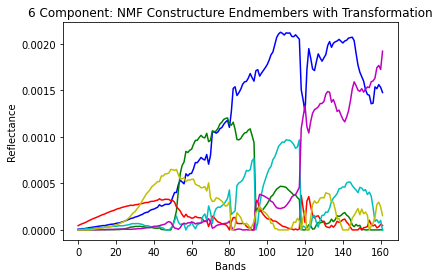

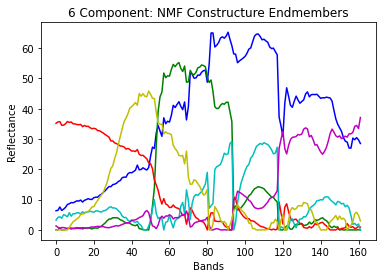

In [61]:
print(W.shape)

W_reflection = convertWToReflectivity(W)
# print(W_reflection)
print(W_reflection.shape)

plot_endmembers(W_reflection, 6, title="6 Component: NMF Constructure Endmembers with Transformation")
plot_endmembers(W, 6, title="6 Component: NMF Constructure Endmembers")



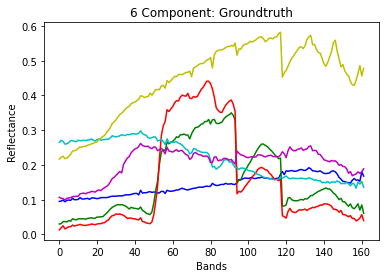

In [62]:
hs_image = sio.loadmat("../data/groundTruth_Urban_end6/end6_groundTruth.mat")

W_gt6 = hs_image["M"]
plot_endmembers(W_gt6, 6, title="6 Component: Groundtruth")



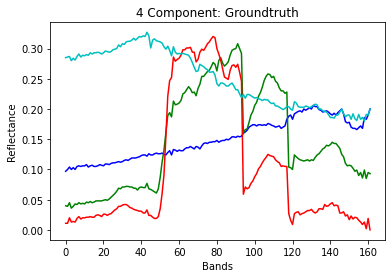

In [63]:
hs_image = sio.loadmat("../data/groundTruth/end4_groundTruth.mat")

W_gt4 = hs_image["M"]
plot_endmembers(W_gt4, 4, title="4 Component: Groundtruth")


In [64]:
rms = mean_squared_error(W_gt6, W_reflection, squared=False)
rms

0.23744218094209182